<a href="https://colab.research.google.com/github/kulvanth5/optimization-techniques/blob/main/23910-MDSC-103-Assignement-III.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

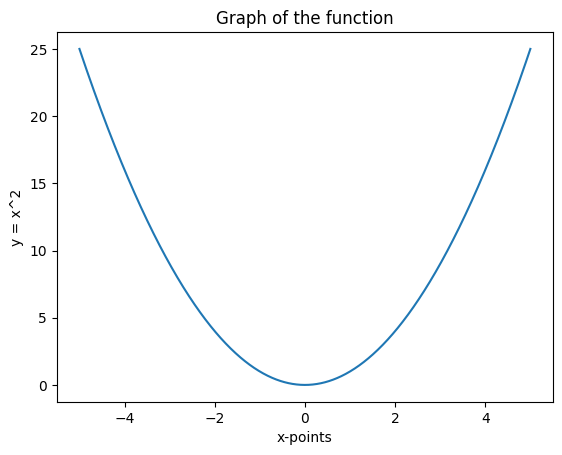

In [1]:
import numpy as np
import matplotlib.pyplot as plt

lr = 0.1

x = np.linspace(-5,5,1000)

y = x**2

plt.plot(x,y)
plt.xlabel('x-points')
plt.ylabel('y = x^2')
plt.title('Graph of the function')
plt.show()

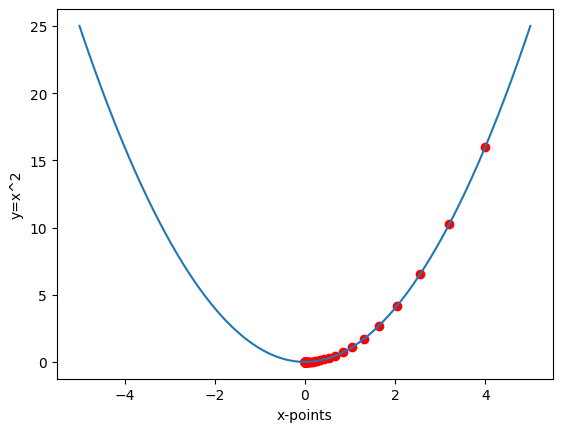

In [2]:
def f(x):
  return x - (lr*2*x)

x0 = 4
xn = f(x0)
tol = 0.00001

x_values = [x0,]
iter = 0

#iterating to max of 100 to find the point at which the gradient vanishes
while iter < 100:
    x0 = xn
    x_values.append(x0)
    xn = f(x0)
    iter = iter + 1

func_values = [ x**2 for x in x_values]     #computing the function values at the computed xn's

plt.scatter(x_values,func_values,color='r') #plotting all the points that lead to vanishing point of gradient.
plt.plot(x,y)
plt.xlabel('x-points')
plt.ylabel('y=x^2')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

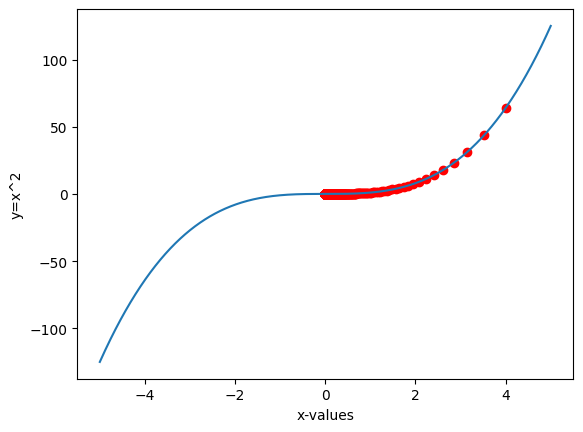

In [3]:
g = lambda x: x**3        #actual function
dg = lambda x: 3*(x**2)   #derivate of the function

def grad(dg,x0,lr,tol): #this function iteratively computes all the points that lead to

    x_values = [x0]
    g_values = [g(x0)]
    xn = x0 - lr*dg(x0)

    while abs(xn-x0) > tol:   #checking for difference b/w prev value and current value is less than the tolerance
      x0 = xn
      xn = x0 - lr*dg(x0)
      x_values.append(x0)

    return x_values

x_values = grad(dg,4,0.01,1e-7)
func = [ g(x) for x in x_values]

plt.plot(x,g(x))
plt.scatter(x_values,func,color='r')
plt.xlabel('x-values')
plt.ylabel('y=x^2')
plt.show

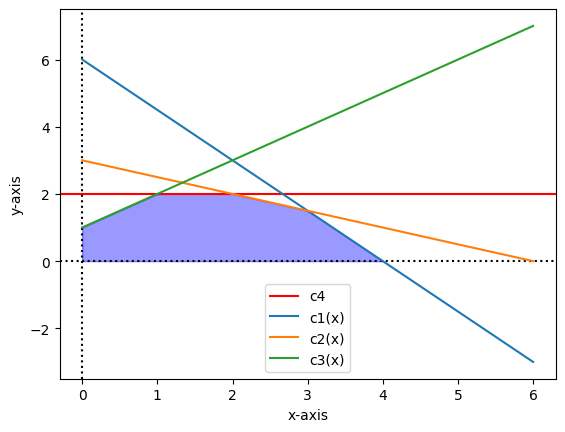

In [118]:
import scipy.optimize
from scipy.optimize import linprog
import numpy as np


c = [-5,-4]

A_up = np.array([[6,4],[1,2],[-1,1],[0,2]])

B_up = np.array([24,6,1,2])

res = linprog(c,A_ub=A_up,b_ub=B_up,bounds=None)

f = lambda x: -5*x/4

c1 = lambda x: 6 - 1.5*x

c2 = lambda x: 3 - 0.5*x

c3 = lambda x: 1+x

c4 = 2

x = np.linspace(0,6,100)

plt.axhline(y=0,color='black',linestyle=':')
plt.axhline(y=2,color='red',linestyle='-',label='c4')
plt.axvline(x=0,color='black',linestyle=':')

plt.plot(x,c1(x),label='c1(x)')
plt.plot(x,c2(x),label='c2(x)')
plt.plot(x,c3(x),label='c3(x)')

plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.legend()

y1 = np.minimum(c2(x),c3(x))
y1 = np.minimum(y1,c4)
y1 = np.minimum(y1,c1(x))

plt.fill_between(x,y1,where=(y1>=0),color='blue',alpha=0.4)